# includes

In [6]:
import mplfinance as mpf
import pandas as pd

from data_proc import DataProc
from capture_plot import CaptureOnClick
# SYMBOLS = ['BTCUSDT', 'ETHUSDT', 'SOLUSDT', 'AVAXUSDT']

from datetime import datetime, timedelta
import os

%matplotlib widget
#%matplotlib inline
#%matplotlib notebook


In [7]:
print(mpf.__version__)

0.12.10b0


# simple flow

## Configure data input

### Presets

- SYMBOLS = 'BTCUSDT', 'ETHUSDT', 'SOLUSDT', 'AVAXUSDT'
- INTERVALS = '1m', '3m', '5m', '15m', '30m', '1h', '2h', '4h', '6h', '8h', '12h', '1d', '3d', '1w', '1M'
- TOTAL_CANDLES = 100
- SYMBOL = 'BTCUSDT'
- DEF_INTERVAL = '1m'

SYMBOLS must be included into data_proc as well to create datastore structure (to be fixed)

In [8]:
#initialize data processor
TOTAL_CANDLES = 100

dp = DataProc('.\\.data\\ntb\\v0.0501a\\')

print(dp)

#### Configure data

In [ ]:

#datamap initialized with two entries: BTCUSDT and ETHUSDT, each may hold candles data in corresponding interval from INTERVALS 
datamap = pd.DataFrame(dp.data_map)

#data is accumulated here, (TODO:and updated when needed )
datastore = pd.DataFrame(dp.pair_df_store)

#get one TOTAL_CANDLES set of OCHL+Volume for 
pair_df = pd.DataFrame(datastore['BTCUSDT']['1m'])

#default load:
last_updated = datamap['BTCUSDT']['1m']['Updated']
start_date = datamap['BTCUSDT']['1m']['StartDate']
end_date = datamap['BTCUSDT']['1m']['EndDate']

total_candles = pd

print (f'\nwe have: {TOTAL_CANDLES} candles of {dp.pair} at {dp.interval} loaded on {last_updated} between dates: {start_date}-{end_date} \n')
print(datamap.shape, datastore.shape, pair_df.shape, '\n')
print(pair_df.index[0:5], '\n')
print(pair_df[0:5], '\n')

#### Load data

In [8]:
pair_df,_,_ = dp.get_new_data('BTCUSDT', '1h')

print(pair_df)

                         Open      High       Low     Close      Volume
Date                                                                   
2023-12-13 20:00:00  42734.01  42888.00  42571.57  42874.87  2573.12511
2023-12-13 21:00:00  42874.88  43187.30  42717.43  42988.49  2338.18611
2023-12-13 22:00:00  42988.48  43475.20  42933.55  42962.41  3701.81352
2023-12-13 23:00:00  42962.41  43042.19  42841.10  42869.03  1728.87522
2023-12-14 00:00:00  42869.03  42948.55  42648.95  42788.85  1834.74333
...                       ...       ...       ...       ...         ...
2023-12-17 19:00:00  42173.21  42218.86  42055.86  42105.91   654.78292
2023-12-17 20:00:00  42105.91  42190.87  42102.87  42122.80   501.70265
2023-12-17 21:00:00  42122.81  42122.81  41911.10  41938.01   638.38623
2023-12-17 22:00:00  41938.00  41943.87  41631.89  41717.86  1024.86789
2023-12-17 23:00:00  41717.85  41748.78  41670.00  41691.09   268.19153

[100 rows x 5 columns]


## Aquire selections
* left click places buy mark
* right click places sell mark
* shift+left click removes the nearest mark

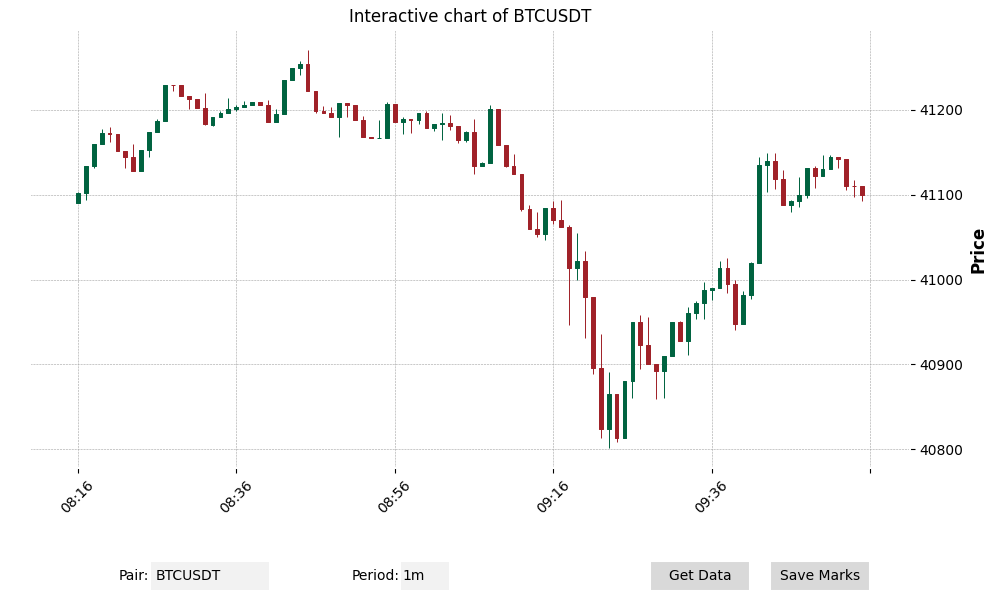

In [11]:
plotter_default = CaptureOnClick(data_proc=dp)
#plotter = CaptureOnClick(pair_df=pair_df, data_proc=dp)

## Utils. 
* Store selections

In [7]:
# Save points to file
# plotter.save_m_to_file()

print(f'Current pair: {plotter.pair} current interval: {plotter.interval}')
   

Current pair: BTCUSDT current interval: 1h


## debug print from chart, on mouse click 

In [12]:
print(plotter.captured_output)

1h reconfirmed. | 


In [9]:
df = pd.DataFrame(datamap)

df = df.loc[:, df.notna().any()][:5]

print(df)

                                               BTCUSDT  \
1m   {'StartDate': 2023-12-17 20:18:00, 'EndDate': ...   
3m   {'StartDate': None, 'EndDate': None, 'Updated'...   
5m   {'StartDate': None, 'EndDate': None, 'Updated'...   
15m  {'StartDate': None, 'EndDate': None, 'Updated'...   
30m  {'StartDate': None, 'EndDate': None, 'Updated'...   

                                               ETHUSDT  \
1m   {'StartDate': None, 'EndDate': None, 'Updated'...   
3m   {'StartDate': None, 'EndDate': None, 'Updated'...   
5m   {'StartDate': None, 'EndDate': None, 'Updated'...   
15m  {'StartDate': None, 'EndDate': None, 'Updated'...   
30m  {'StartDate': None, 'EndDate': None, 'Updated'...   

                                               SOLUSDT  \
1m   {'StartDate': None, 'EndDate': None, 'Updated'...   
3m   {'StartDate': None, 'EndDate': None, 'Updated'...   
5m   {'StartDate': None, 'EndDate': None, 'Updated'...   
15m  {'StartDate': None, 'EndDate': None, 'Updated'...   
30m  {'Start